In [ ]:
# Atėjo metas sujungti visas žinias į vieną vietą, tam pasitelksime didesnės apimties užduotį:

# Parsisiųskite šį dataset: https://archive.ics.uci.edu/dataset/109/wine (galite rinktis ir bet kurį kitą, jus dominantį dataset)

# atlikite žemiau nurodytus žingsnius:

# Žingsniai:

# 1. Duomenų užkrovimas ir paruošimas
# 2. Klasterizavimas
#     2.1. Hierarchinis klasterizavimas
#     2.2. K-vidurkių klasterizavimas
#     2.3. DBSCAN klasterizavimas
# 3. Klasifikavimas
#     3.1. Decision Trees
#     3.2. Random Forests
#     3.3. Naive Bayes
#     3.4. Regresija
#     3.5. Linijinė regresija
#     3.6. Polinominė regresija
# 4. Modelio vertinimas
#     4.1. Tikslumas, jautrumas, specifiškumas
#     4.2. ROC ir AUC analizė
# 5. Hiperparametrų optimizavimas
#     5.1. Grid Search
# 6. Modelių interpretavimas

# Atlikus visus šiuos punktus aprašykite išvadą: kokie žingsniai buvo atlikti paruošiant duomenis, kuris klasterizavimo metodas 
# buvo labiausiai tinkamas ir dėl kokių priežasčių, kuris klasifikavimo metodas buvo tinkamiausias, ką sužinote iš modelio vertinimo, 
# kokie hiperparametrai yra geriausi? Taip pat pritaikykite modelio interpretavimą keliems įrašams (pavieniui) argumentuotai atsakykite 
# kodėl vienas įrašas yra klasifikuojamas yra būtent prie tam tikros klasės.

In [1]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, mean_squared_error, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from random import randint
from sklearn.model_selection import RandomizedSearchCV
import lime
import lime.lime_tabular
import numpy as np

In [54]:
        # 1. Duomenų užkrovimas ir paruošimas

df = pd.read_csv('water_potability.csv')
df.columns = ['Ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']
df_filled = df.apply(lambda x: x.fillna(x.mean()), axis=0)
# df_cleaned = df.dropna()
X = df_filled.drop('Potability', axis=1)
y = df_filled['Potability']



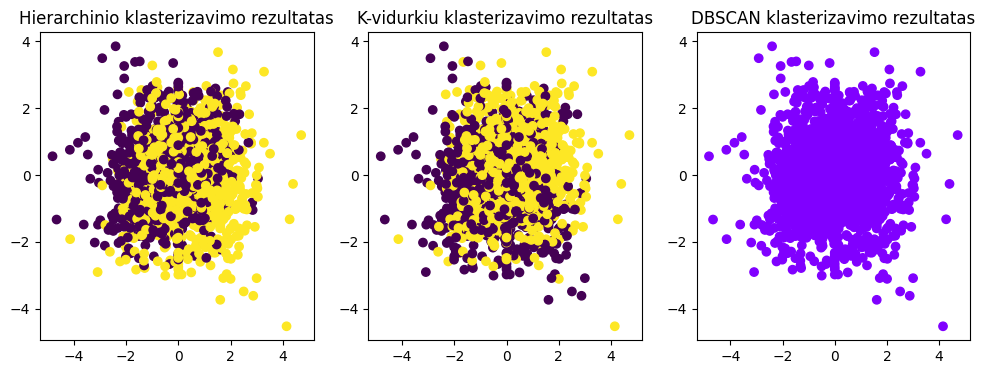

In [55]:
        # 2. Klasterizavimas
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# 2.1. Hierarchinis klasterizavimas

# Hierarchinio klasterizavimo modelio sukurimas su 3 klasteriais
h_clustering = AgglomerativeClustering(n_clusters=2)
h_clusters = h_clustering.fit_predict(scaled_data)

# 2.2. K-vidurkių klasterizavimas

kmeans = KMeans(n_clusters=2)
k_clusters = kmeans.fit_predict(scaled_data)

 # 2.3. DBSCAN klasterizavimas

dbscan = DBSCAN(eps=0.5, min_samples=5)
db_clusters = dbscan.fit_predict(scaled_data)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=h_clusters, cmap='viridis')
plt.title('Hierarchinio klasterizavimo rezultatas')

plt.subplot(1, 3, 2)
plt.scatter(scaled_data[:,0], scaled_data[:,1], c=k_clusters, cmap='viridis')
plt.title('K-vidurkiu klasterizavimo rezultatas')

plt.subplot(1, 3, 3)
plt.scatter(scaled_data[:,0], scaled_data[:,1], c=db_clusters, cmap='rainbow')
plt.title('DBSCAN klasterizavimo rezultatas')

plt.show()

In [56]:
#       3. Klasifikavimas
# 3.1. Decision Trees

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

dt_y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(dt_y_pred, y_test)
print('Decision Tree sprendimo tikslumas:', accuracy)

# 3.2. Random Forests

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

rf_y_pred = rf_model.predict(X_test)

random_accuracy = accuracy_score(rf_y_pred, y_test)
print('Random Forests sprendimo tikslumas:', random_accuracy)

# 3.3. Naive Bayes

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

nb_y_pred = nb_model.predict(X_test)

accuracy = accuracy_score(nb_y_pred, y_test)
print('Nayve Bayes Sprendimo tikslumas:', accuracy)

Decision Tree sprendimo tikslumas: 0.5670731707317073
Random Forests sprendimo tikslumas: 0.6722560975609756
Nayve Bayes Sprendimo tikslumas: 0.6310975609756098


In [57]:
# 4. Modelio vertinimas
    # 4.1. Tikslumas, jautrumas, specifiškumas
cm_dt = confusion_matrix(y_test, dt_y_pred)

jautrumas = cm_dt[1,1] / (cm_dt[1, 0] + cm_dt[1, 1])
print('Jautrumas:', jautrumas)

specifiskumas = cm_dt[0,0] / (cm_dt[0,0] + cm_dt[0,1])
print('Specifiskumas:', specifiskumas)

Jautrumas: 0.45901639344262296
Specifiskumas: 0.6310679611650486


In [60]:
cm_rf = confusion_matrix(y_test, rf_y_pred)
jautrumas = cm_rf[1,1] / (cm_rf[1, 0] + cm_rf[1, 1])
print('Jautrumas:', jautrumas)

specifiskumas = cm_rf[0,0] / (cm_rf[0,0] + cm_rf[0,1])
print('Specifiskumas:', specifiskumas)

Jautrumas: 0.32786885245901637
Specifiskumas: 0.8762135922330098


In [61]:
cm_nb = confusion_matrix(y_test, nb_y_pred)
jautrumas = cm_nb[1,1] / (cm_nb[1, 0] + cm_nb[1, 1])
print('Jautrumas:', jautrumas)

specifiskumas = cm_nb[0,0] / (cm_nb[0,0] + cm_nb[0,1])
print('Specifiskumas:', specifiskumas)

Jautrumas: 0.21721311475409835
Specifiskumas: 0.8762135922330098


In [62]:
    # 4.2. ROC ir AUC analizė
dt_prob = dt_model.predict_proba(X_test)
print(dt_prob)

[[1. 0.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]


[0.         0.36893204 1.        ] [0.         0.45901639 1.        ]


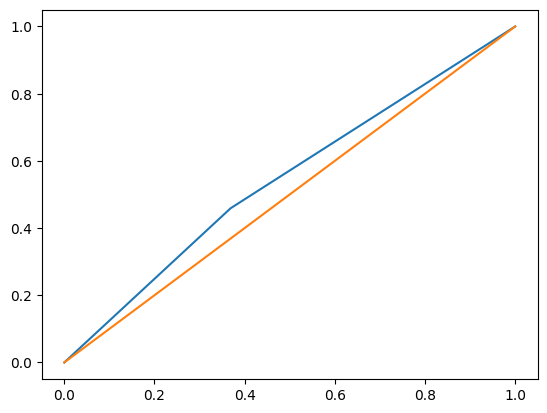

[0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0.
 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1.
 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1.
 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1.
 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1.

In [63]:
dt_y_prob = dt_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, dt_y_prob)
print(fpr, tpr)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])
plt.show()

print(dt_y_prob)

In [34]:
# 5. Hiperparametrų optimizavimas
    # 5.1. Grid Search

rf_model = RandomForestClassifier()
param_grid = {
    'n_estimators': [10, 50, 100, 200], # medziu kiekis
    'max_depth' : [None, 10, 20], # sprendimu kiekis medyje
    'min_samples_split' : [2, 5, 10] # minimalus pavyzdziu kiekis
}

gris_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
gris_search.fit(X, y)

print(f'Geriausi parametrai: {gris_search.best_params_}')
print(f'Geriausias tikslumas: {gris_search.best_score_}')

dt_model2 = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=10)

Geriausi parametrai: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}
Geriausias tikslumas: 0.641030999813815


In [35]:
param_grid = {
    'n_estimators': [randint(10, 200)], # medziu kiekis
    'max_depth' : [None, 10, 20], # sprendimu kiekis medyje
    'min_samples_split' : [randint(2, 20)] # minimalus pavyzdziu kiekis
}

random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=100, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X, y)

print(f'Geriausi parametrai: {random_search.best_params_}')
print(f'Geriausias tikslumas: {random_search.best_score_}')

c:\Users\ostap\OneDrive\Рабочий стол\Mokymai\Duomenu_mokslas\mokymai\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 3 is smaller than n_iter=100. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Geriausi parametrai: {'n_estimators': 43, 'min_samples_split': 9, 'max_depth': 10}
Geriausias tikslumas: 0.6340108918264755


In [45]:
# 6. Modelių interpretavimas
dt_model2 = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=10)
dt_model2.fit(X, y)
X = np.array(X)

explainer = lime.lime_tabular.LimeTabularExplainer(training_data=X, feature_names=df.columns.drop('Potability'), class_names=['Not Potable', 'Potable'], mode='classification')
explain_first = explainer.explain_instance(X[1], dt_model2.predict_proba, num_features=10)
explain_first.show_in_notebook(show_all=False)